## 1.  Load


### 1.1. Dataset information

In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("customer_signups.csv")

#Dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  290 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


### 3.3 Number of duplicates removed 

In [2]:
# Column names
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['customer_id', 'name', 'email', 'signup_date', 'source', 'region', 'plan_selected', 'marketing_opt_in', 'age', 'gender']


In [3]:
#First 5 rows
print("\nFirst 5 rows:")
display(df.head())



First 5 rows:


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


### 1.2. Identify Missing Values

In [4]:
#Missing values summary
print("\nMissing values per column:")
missing_summary = pd.DataFrame({
    "Missing Count": df.isnull().sum(),
    "Missing Percentage": (df.isnull().mean() * 100).round(2)
})
display(missing_summary)


Missing values per column:


,Missing Count,Missing Percentage
customer_id,2,0.67
name,9,3.00
email,34,11.33
signup_date,2,0.67
source,9,3.00
region,30,10.00
plan_selected,8,2.67
marketing_opt_in,10,3.33
age,12,4.00
gender,8,2.67


In [5]:
#Data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
customer_id         object
name                object
email               object
signup_date         object
source              object
region              object
plan_selected       object
marketing_opt_in    object
age                 object
gender              object
dtype: object


## 2. Data Cleaning and Transformation


### 2.1 Convert `signup_date` to Datetime

In [6]:
# Convert 'signup_date' to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce', dayfirst=True)

# Show cleaned signup_date column
print("Converted column: 'signup_date' (first 5 values):")
display(df[['signup_date']].head(5))

# Show data type
print("\nData type of 'signup_date':", df['signup_date'].dtype)



Converted column: 'signup_date' (first 5 values):


C:\Users\PC\AppData\Local\Temp\ipykernel_6428\2912961330.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce', dayfirst=True)


,signup_date
0,NaT
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05



Data type of 'signup_date': datetime64[ns]


### 2.2 Convert `age` to numeric

In [58]:
# Convert 'age' to numeric (force invalid entries to NaN)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Invalidate unrealistic age values (<18 or >100)
df.loc[(df['age'] < 18) | (df['age'] > 100), 'age'] = pd.NA

# Show cleaned age column
print("Converted column: 'age' (first 5 values):")
display(df[['age']].head(5))

# Show data type
print("\nData type of 'age':", df['age'].dtype)

# Show count of missing/invalid values
invalid_age_count = df['age'].isna().sum()
print(f"\nNumber of missing or invalid ages after cleaning: {invalid_age_count}")


Converted column: 'age' (first 5 values):


,age
1,29.0
2,34.0
3,40.0
4,25.0
5,34.0



Data type of 'age': float64

Number of missing or invalid ages after cleaning: 1


### 2.2 Standardise Inconsistent Text Values

In [8]:
#Standardize 'plan_selected'
changed_plan = (df['plan_selected'] != df['plan_selected'].str.strip().str.title()).sum()
df['plan_selected'] = df['plan_selected'].str.strip().str.title()
df['plan_selected'] = df['plan_selected'].replace({'Unknownplan': pd.NA})
print(f"Standardised {changed_plan} values in 'plan_selected'")

Standardised 144 values in 'plan_selected'


In [9]:
#Standardize 'gender'
changed_gender = (df['gender'] != df['gender'].str.strip().str.title()).sum()
df['gender'] = df['gender'].str.strip().str.title()
df['gender'] = df['gender'].replace({'123': pd.NA})
print(f"Standardised {changed_gender} values in 'gender'")

Standardised 108 values in 'gender'


In [10]:
#Standardize 'marketing_opt_in'
changed_marketing = (df['marketing_opt_in'] != df['marketing_opt_in'].str.strip().str.title()).sum()
df['marketing_opt_in'] = df['marketing_opt_in'].str.strip().str.title()
print(f"Standardised {changed_marketing} values in 'marketing_opt_in'")

Standardised 10 values in 'marketing_opt_in'


In [11]:
#Standardize 'source'
changed_source = (df['source'] != df['source'].str.strip().str.title()).sum()
df['source'] = df['source'].str.strip().str.title()
print(f"Standardised {changed_source} values in 'source'")

Standardised 106 values in 'source'


In [12]:
#Standardize 'region'
changed_region = (df['region'] != df['region'].str.strip().str.title()).sum()
df['region'] = df['region'].str.strip().str.title()
print(f"Standardised {changed_region} values in 'region'")

Standardised 30 values in 'region'


### 2.3 Remove duplicate rows based on customer_id 

In [18]:
# Normalize 'customer_id' (preserving NaNs)
df['customer_id'] = df['customer_id'].astype('string').str.strip().str.upper()

# Count duplicates with actual values (excluding NaN)
duplicates_real = df['customer_id'].duplicated(keep=False) & df['customer_id'].notna()
print(f"Duplicate 'customer_id' values (non-NaN): {duplicates_real.sum()}")

# Count entries with NaN in 'customer_id'
duplicates_nan = df['customer_id'].isna().sum()
print(f"'customer_id' values that are NaN: {duplicates_nan}")

# Remove duplicate rows (keep the first occurrence)
df = df.drop_duplicates(subset='customer_id', keep='first')
print(f"Remaining rows after removing duplicates: {df.shape[0]}")


Duplicate 'customer_id' values (non-NaN): 0
'customer_id' values that are NaN: 0
Remaining rows after removing duplicates: 299


### 2.4 Handle missing values 

In [34]:
#Fill missing 'region' with 'Unknown'
missing_region = df['region'].isna().sum()
df['region'] = df['region'].fillna('Unknown')
print(f"Filled {missing_region} missing values in 'region' with 'Unknown'.")

Filled 0 missing values in 'region' with 'Unknown'.


In [35]:
# Drop rows with missing 'email' (essential for contact/identity)
missing_email = df['email'].isna().sum()
df = df.dropna(subset=['email'])
print(f"Dropped {missing_email} rows with missing 'email'.")

Dropped 0 rows with missing 'email'.


In [36]:
#Drop rows with missing 'customer_id' (should be unique per user)
missing_id = df['customer_id'].isna().sum()
df = df.dropna(subset=['customer_id'])
print(f"Dropped {missing_id} rows with missing 'customer_id'.")

Dropped 0 rows with missing 'customer_id'.


In [37]:
#Fill missing or invalid 'age' values with the median
missing_age = df['age'].isna().sum()
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)
print(f"Filled {missing_age} missing or invalid values in 'age' with median ({median_age}).")

Filled 0 missing or invalid values in 'age' with median (34.0).


In [38]:
#Fill missing 'gender' with 'Unspecified'
missing_gender = df['gender'].isna().sum()
df['gender'] = df['gender'].fillna('Unspecified')
print(f"Filled {missing_gender} missing values in 'gender' with 'Unspecified'.")

Filled 0 missing values in 'gender' with 'Unspecified'.


In [39]:
#Fill missing 'plan_selected' with 'Unknown'
missing_plan = df['plan_selected'].isna().sum()
df['plan_selected'] = df['plan_selected'].fillna('Unknown')
print(f"Filled {missing_plan} missing values in 'plan_selected' with 'Unknown'.")

Filled 0 missing values in 'plan_selected' with 'Unknown'.


In [40]:
#Fill missing 'source' with 'Unknown'
missing_source = df['source'].isna().sum()
df['source'] = df['source'].fillna('Unknown')
print(f"Filled {missing_source} missing values in 'source' with 'Unknown'.")

Filled 9 missing values in 'source' with 'Unknown'.


In [41]:
#Fill missing 'marketing_opt_in' with 'No'
missing_opt_in = df['marketing_opt_in'].isna().sum()
df['marketing_opt_in'] = df['marketing_opt_in'].fillna('No')
print(f"Filled {missing_opt_in} missing values in 'marketing_opt_in' with 'No'.")

Filled 9 missing values in 'marketing_opt_in' with 'No'.


## 3. Summary Outputs


### 3.1 Sign-ups per week  

In [54]:
# Group by week and count sign-ups
weekly_signups = df.groupby(pd.Grouper(key='signup_date', freq='W')).size()

# Convert to DataFrame for clear display
weekly_signups_df = weekly_signups.reset_index()
weekly_signups_df.columns = ['Week', 'Sign-ups']

# Display the full table
print("Weekly Sign-ups Summary:")
print(weekly_signups_df)


Weekly Sign-ups Summary:
         Week  Sign-ups
0  2024-01-07         6
1  2024-01-14         6
2  2024-01-21         6
3  2024-01-28         6
4  2024-02-04         8
5  2024-02-11         6
6  2024-02-18         6
7  2024-02-25         6
8  2024-03-03         7
9  2024-03-10         6
10 2024-03-17         6
11 2024-03-24         5
12 2024-03-31         5
13 2024-04-07         7
14 2024-04-14         6
15 2024-04-21         6
16 2024-04-28         6
17 2024-05-05         6
18 2024-05-12         6
19 2024-05-19         6
20 2024-05-26         6
21 2024-06-02         6
22 2024-06-09         6
23 2024-06-16         6
24 2024-06-23         6
25 2024-06-30         6
26 2024-07-07         7
27 2024-07-14         6
28 2024-07-21         5
29 2024-07-28         6
30 2024-08-04         6
31 2024-08-11         6
32 2024-08-18         6
33 2024-08-25         6
34 2024-09-01         6
35 2024-09-08         7
36 2024-09-15         6
37 2024-09-22         6
38 2024-09-29         6
39 2024-10-06  

### 3.2 Sign-ups by source, region, and plan_selected

In [55]:
#Sign-ups by source
signup_by_source = df['source'].value_counts().reset_index()
signup_by_source.columns = ['Source', 'Sign-ups']

print("Sign-ups by Source:")
print(signup_by_source)

#Sign-ups by region
signup_by_region = df['region'].value_counts().reset_index()
signup_by_region.columns = ['Region', 'Sign-ups']

print("\nSign-ups by Region:")
print(signup_by_region)

#Sign-ups by plan_selected
signup_by_plan = df['plan_selected'].value_counts().reset_index()
signup_by_plan.columns = ['Plan Selected', 'Sign-ups']

print("\nSign-ups by Plan Selected:")
print(signup_by_plan)



Sign-ups by Source:
      Source  Sign-ups
0    Youtube        53
1   Referral        44
2     Google        43
3  Instagram        40
4   Facebook        37
5   Linkedin        33
6    Unknown         9
7         ??         6

Sign-ups by Region:
    Region  Sign-ups
0    North        55
1    South        55
2     East        54
3     West        41
4  Central        34
5  Unknown        26

Sign-ups by Plan Selected:
  Plan Selected  Sign-ups
0       Premium        87
1         Basic        84
2           Pro        82
3       Unknown        12


### 3.3 Marketing opt-in counts by gender 

In [56]:
# Group by gender and marketing_opt_in, then count
marketing_by_gender = df.groupby(['gender', 'marketing_opt_in']).size().reset_index(name='Count')

# Display the result
print("Marketing Opt-in Counts by Gender:")
print(marketing_by_gender)



Marketing Opt-in Counts by Gender:
        gender marketing_opt_in  Count
0       Female               No     44
1       Female              Yes     40
2         Male               No     47
3         Male              Yes     35
4   Non-Binary               No     20
5   Non-Binary              Yes     17
6        Other               No     30
7        Other              Yes     21
8  Unspecified               No      6
9  Unspecified              Yes      5


### 3.4 Age summary: min, max, mean, median, null count 

In [59]:
# Group all rows into a single group to apply aggregation
age_summary = df.groupby(lambda _: True)['age'].agg(
    min_age='min',
    max_age='max',
    mean_age='mean',
    median_age='median',
    null_count=lambda x: x.isna().sum()
).reset_index(drop=True)

print("Age Summary (using .groupby()):")
print(age_summary)



Age Summary (using .groupby()):
   min_age  max_age   mean_age  median_age  null_count
0     21.0     60.0  35.901515        34.0           1


## 4.  Answer These Business Questions 


### 4.1 Which acquisition source brought in the most users last month?

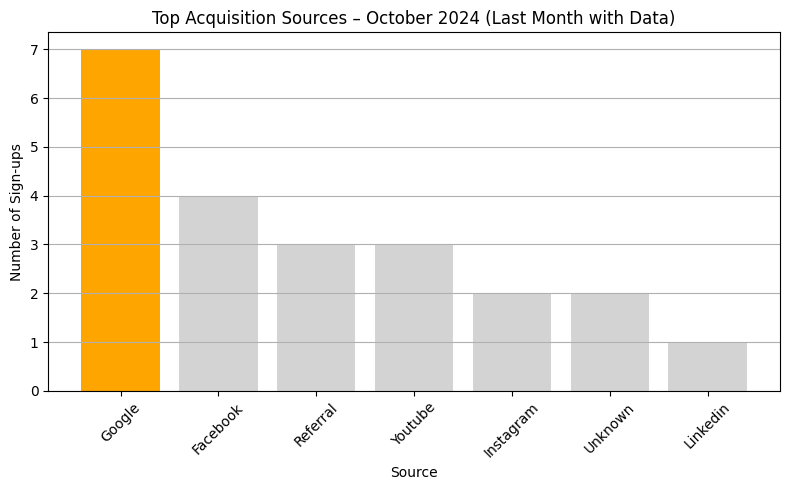


 Top Source: Google with 7 users in October 2024


In [63]:
# Get the latest signup date
latest_date = df['signup_date'].max()
last_month_start = latest_date.replace(day=1)
last_month_end = last_month_start + pd.offsets.MonthEnd(1)

# Filter signups for that last month
last_month_signups = df[
    (df['signup_date'] >= last_month_start) &
    (df['signup_date'] <= last_month_end)
]

# Count sign-ups by source
source_counts = last_month_signups['source'].value_counts().reset_index()
source_counts.columns = ['Source', 'Sign-ups']

# Plot with highlight
if not source_counts.empty:
    top_source = source_counts.iloc[0]

    colors = ['lightgray' if source != top_source['Source'] else 'orange'
              for source in source_counts['Source']]

    plt.figure(figsize=(8, 5))
    plt.bar(source_counts['Source'], source_counts['Sign-ups'], color=colors)
    plt.title(f"Top Acquisition Sources – {last_month_start.strftime('%B %Y')} (Last Month with Data)")
    plt.xlabel("Source")
    plt.ylabel("Number of Sign-ups")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    print(f"\n Top Source: {top_source['Source']} with {top_source['Sign-ups']} users in {last_month_start.strftime('%B %Y')}")
else:
    print("No sign-ups found for the last month with data.")




### 4.2 Which region shows signs of missing or incomplete data? 

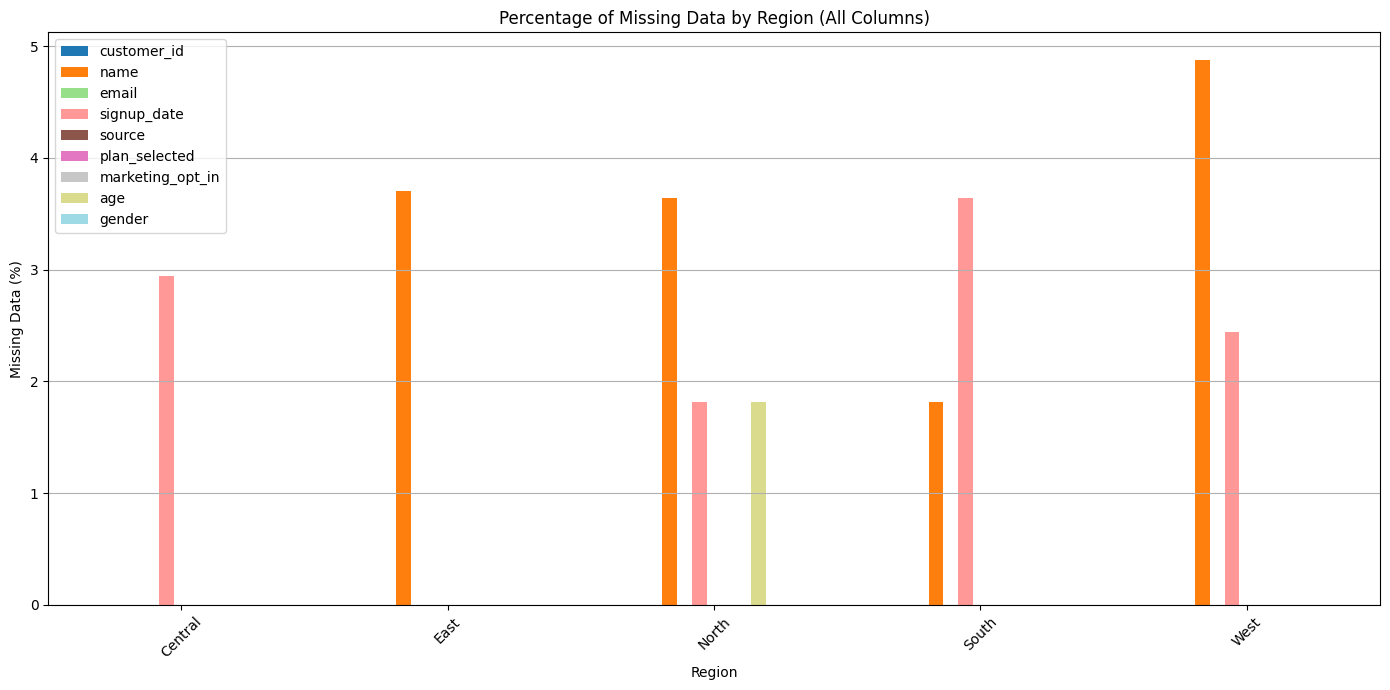

Full summary of missing data percentage by region (all columns):
         customer_id  name  email  signup_date  source  plan_selected  \
region                                                                  
Central          0.0  0.00    0.0         2.94     0.0            0.0   
East             0.0  3.70    0.0         0.00     0.0            0.0   
North            0.0  3.64    0.0         1.82     0.0            0.0   
South            0.0  1.82    0.0         3.64     0.0            0.0   
West             0.0  4.88    0.0         2.44     0.0            0.0   

         marketing_opt_in   age  gender  
region                                   
Central               0.0  0.00     0.0  
East                  0.0  0.00     0.0  
North                 0.0  1.82     0.0  
South                 0.0  0.00     0.0  
West                  0.0  0.00     0.0  


In [ ]:
# Filter out invalid region entries
valid_regions = df[
    ~df['region'].isin(['Unknown', 'Unspecified', '', 'None']) & df['region'].notna()
]

# Columns to analyze (all except 'region')
cols_to_check = [col for col in df.columns if col != 'region']

# Calculate percentage of missing data per region for all columns (no filtering)
missing_by_region_all = valid_regions.groupby('region')[cols_to_check]\
    .apply(lambda x: x.isna().mean() * 100).round(2)

# Plot all columns
missing_by_region_all.plot(kind='bar', figsize=(14, 7), colormap='tab20')
plt.title("Percentage of Missing Data by Region (All Columns)")
plt.xlabel("Region")
plt.ylabel("Missing Data (%)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display full summary table
print("Full summary of missing data percentage by region (all columns):")
print(missing_by_region_all)





### 4.2 Are older users more or less likely to opt in to marketing? 

Correlation between age and marketing opt-in: -0.000


C:\Users\PC\AppData\Local\Temp\ipykernel_6428\3672082002.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels, right=False)
C:\Users\PC\AppData\Local\Temp\ipykernel_6428\3672082002.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  opt_in_rate = df_clean.groupby('age_group')['marketing_opt_in_bin'].mean() * 100


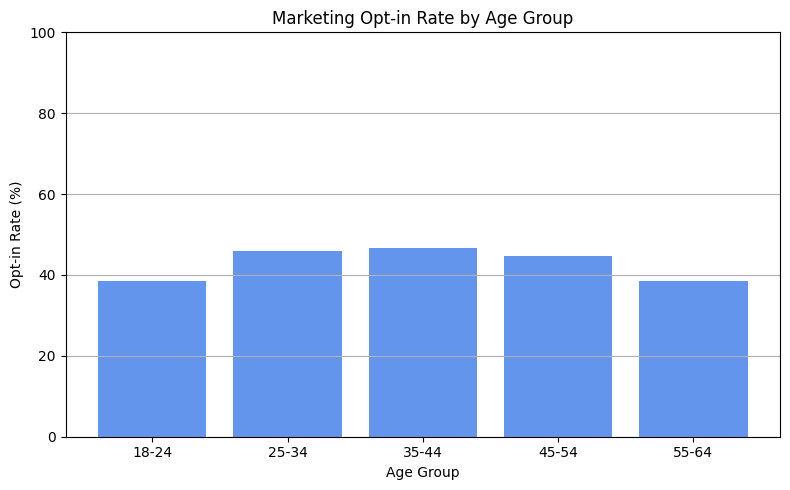

No clear trend between age and marketing opt-in.


In [ ]:
# Prepare binary marketing opt-in column
df['marketing_opt_in_bin'] = df['marketing_opt_in'].str.strip().str.lower().map({'yes':1, 'no':0})

# Drop rows with missing age or opt-in info
df_clean = df.dropna(subset=['age', 'marketing_opt_in_bin'])

# Calculate Pearson correlation
corr = df_clean['age'].corr(df_clean['marketing_opt_in_bin'])
print(f"Correlation between age and marketing opt-in: {corr:.3f}")

# Create age bins
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate opt-in rate per age group
opt_in_rate = df_clean.groupby('age_group')['marketing_opt_in_bin'].mean() * 100
opt_in_rate = opt_in_rate.reset_index(name='Opt-in Rate (%)')

# Plot opt-in rate by age group
plt.figure(figsize=(8,5))
plt.bar(opt_in_rate['age_group'].astype(str), opt_in_rate['Opt-in Rate (%)'], color='cornflowerblue')
plt.title('Marketing Opt-in Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Opt-in Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Interpret correlation strength
if corr > 0.1:
    print("Older users are more likely to opt in to marketing.")
elif corr < -0.1:
    print("Older users are less likely to opt in to marketing.")
else:
    print("No clear trend between age and marketing opt-in.")


### 4.4 Which plan is most commonly selected, and by which age group?  

Most commonly selected plan overall: Premium

Most common plan by age group:
   age_group plan_selected  Count
2      18-24           Pro     10
4      25-34         Basic     45
9      35-44       Premium     20
14     45-54           Pro     16
16     55-64         Basic      4


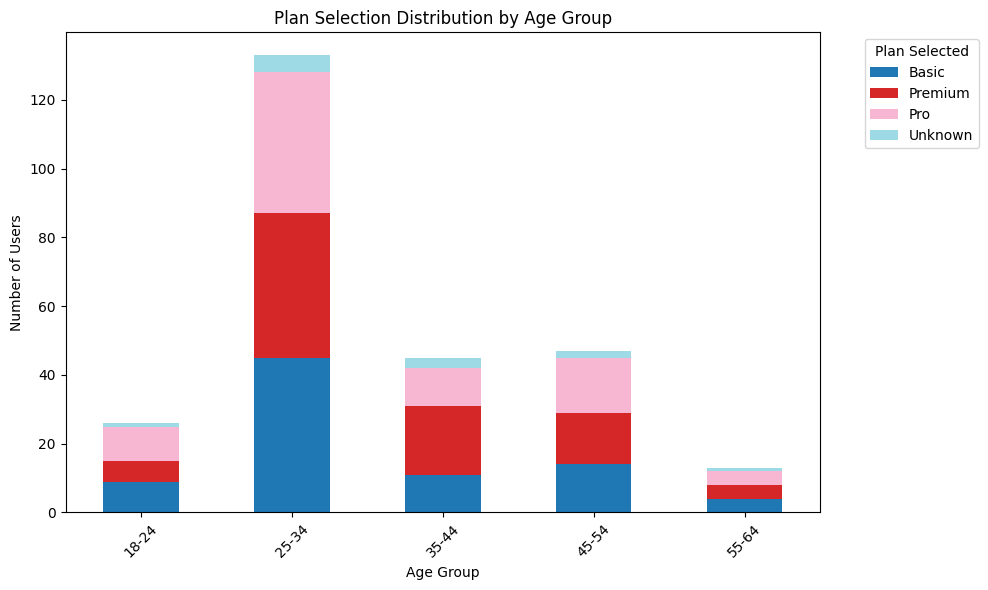

In [79]:
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Add observed=True to groupby to fix warning
plan_age_counts = df.groupby(['age_group', 'plan_selected'], observed=True).size().reset_index(name='Count')

most_common_plan = df['plan_selected'].mode()[0]
print(f"Most commonly selected plan overall: {most_common_plan}")

most_common_by_age = plan_age_counts.loc[plan_age_counts.groupby('age_group', observed=True)['Count'].idxmax()]

print("\nMost common plan by age group:")
print(most_common_by_age)

plan_pivot = plan_age_counts.pivot(index='age_group', columns='plan_selected', values='Count').fillna(0)

plan_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Plan Selection Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Plan Selected', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
